## Research Project Mahasiswa Magister

## Import Libraries

In [444]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [430]:
#download dataset = https://github.com/benjamin2044/PV_fault_Python/blob/master/Solar_categorical.csv
df = pd.read_csv('E:\R-9 Transactions\CSV_Files3\Solar_categorical.csv')

## Explore Dataset

In [431]:
df

,S1(Amp),S2(Amp),S1(Volt),S2(Volt),Light(kiloLux),Temp(degC),Weather,State
0,6.4,6.8,108,109,107.0,34,Sunny,Normal
1,7.1,6.5,110,107,108.0,38,Sunny,Normal
2,6.2,6.5,106,107,107.0,36,Sunny,Normal
3,7.4,6.1,108,109,104.0,35,Sunny,Normal
4,6.5,6.9,109,109,109.0,38,Sunny,Normal
...,...,...,...,...,...,...,...,...
2995,0.1,0.5,66,81,12.0,2,Cloudy,Line-line
2996,0.2,0.5,69,82,13.0,1,Cloudy,Line-line
2997,0.1,0.5,72,89,11.0,3,Cloudy,Line-line
2998,0.1,0.4,69,90,9.0,1,Cloudy,Line-line


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0    S1(Amp)        3000 non-null   float64
 1   S2(Amp)         3000 non-null   float64
 2   S1(Volt)        3000 non-null   int64  
 3   S2(Volt)        3000 non-null   int64  
 4   Light(kiloLux)  3000 non-null   float64
 5   Temp(degC)      3000 non-null   int64  
 6   Weather         3000 non-null   object 
 7   State           3000 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 187.6+ KB


In [16]:
df.describe()

,S1(Amp),S2(Amp),S1(Volt),S2(Volt),Light(kiloLux),Temp(degC)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,3.278633,2.909567,79.149667,76.194333,76.558067,20.328667
std,2.731532,2.502173,35.375270,38.074678,38.265708,12.707261
min,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000
25%,0.400000,0.500000,73.000000,74.000000,14.000000,6.000000
50%,3.400000,3.000000,89.000000,88.000000,94.000000,18.000000
75%,5.900000,5.400000,106.000000,104.000000,104.000000,33.000000
max,7.600000,7.600000,110.000000,110.000000,110.000000,40.000000


In [17]:
df.head()

,S1(Amp),S2(Amp),S1(Volt),S2(Volt),Light(kiloLux),Temp(degC),Weather,State
0,6.4,6.8,108,109,107.0,34,Sunny,Normal
1,7.1,6.5,110,107,108.0,38,Sunny,Normal
2,6.2,6.5,106,107,107.0,36,Sunny,Normal
3,7.4,6.1,108,109,104.0,35,Sunny,Normal
4,6.5,6.9,109,109,109.0,38,Sunny,Normal


In [18]:
df.tail()

,S1(Amp),S2(Amp),S1(Volt),S2(Volt),Light(kiloLux),Temp(degC),Weather,State
2995,0.1,0.5,66,81,12.0,2,Cloudy,Line-line
2996,0.2,0.5,69,82,13.0,1,Cloudy,Line-line
2997,0.1,0.5,72,89,11.0,3,Cloudy,Line-line
2998,0.1,0.4,69,90,9.0,1,Cloudy,Line-line
2999,0.2,0.5,68,86,9.0,2,Cloudy,Line-line


In [19]:
df.head(100)

,S1(Amp),S2(Amp),S1(Volt),S2(Volt),Light(kiloLux),Temp(degC),Weather,State
0,6.4,6.8,108,109,107.0,34,Sunny,Normal
1,7.1,6.5,110,107,108.0,38,Sunny,Normal
2,6.2,6.5,106,107,107.0,36,Sunny,Normal
3,7.4,6.1,108,109,104.0,35,Sunny,Normal
4,6.5,6.9,109,109,109.0,38,Sunny,Normal
...,...,...,...,...,...,...,...,...
95,6.5,6.2,106,106,104.0,35,Sunny,Normal
96,6.8,7.1,105,108,108.0,36,Sunny,Normal
97,6.5,7.5,110,109,106.0,35,Sunny,Normal
98,6.2,7.0,108,108,110.0,38,Sunny,Normal


In [20]:
df.shape

(3000, 8)

In [23]:
len(df)

3000

In [24]:
df.columns

Index([' S1(Amp)', 'S2(Amp)', 'S1(Volt)', 'S2(Volt)', 'Light(kiloLux)',
       'Temp(degC)', 'Weather', 'State'],
      dtype='object')

In [27]:
df['State'].unique()

array(['Normal', 'Open', 'Line-line'], dtype=object)

In [30]:
df.apply(lambda col: col.unique())

 S1(Amp)          [6.4, 7.1, 6.2, 7.4, 6.5, 6.1, 7.2, 6.0, 6.3, ...
S2(Amp)           [6.8, 6.5, 6.1, 6.9, 7.4, 6.4, 6.6, 7.0, 6.3, ...
S1(Volt)          [108, 110, 106, 109, 107, 105, 102, 101, 103, ...
S2(Volt)          [109, 107, 108, 106, 110, 105, 103, 100, 102, ...
Light(kiloLux)    [107.0, 108.0, 104.0, 109.0, 105.0, 103.0, 102...
Temp(degC)        [34, 38, 36, 35, 33, 32, 39, 31, 40, 30, 37, 2...
Weather                                             [Sunny, Cloudy]
State                                     [Normal, Open, Line-line]
dtype: object

In [31]:
df[' S1(Amp)'].value_counts()

 S1(Amp)
0.0    443
0.2    127
0.1    124
0.6     91
0.7     80
      ... 
2.3     10
1.7     10
2.1     10
1.5      9
1.6      8
Name: count, Length: 76, dtype: int64

In [32]:
df['S2(Amp)'].value_counts()

S2(Amp)
0.0    557
0.6    144
0.5    137
0.7    128
5.2    121
      ... 
2.7      9
7.3      8
4.5      7
7.6      6
2.0      1
Name: count, Length: 67, dtype: int64

In [33]:
df.isnull()

,S1(Amp),S2(Amp),S1(Volt),S2(Volt),Light(kiloLux),Temp(degC),Weather,State
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2995,False,False,False,False,False,False,False,False
2996,False,False,False,False,False,False,False,False
2997,False,False,False,False,False,False,False,False
2998,False,False,False,False,False,False,False,False


In [34]:
df.isnull().sum()

 S1(Amp)          0
S2(Amp)           0
S1(Volt)          0
S2(Volt)          0
Light(kiloLux)    0
Temp(degC)        0
Weather           0
State             0
dtype: int64

In [36]:
df[df['State']=='Normal']

,S1(Amp),S2(Amp),S1(Volt),S2(Volt),Light(kiloLux),Temp(degC),Weather,State
0,6.4,6.8,108,109,107.0,34,Sunny,Normal
1,7.1,6.5,110,107,108.0,38,Sunny,Normal
2,6.2,6.5,106,107,107.0,36,Sunny,Normal
3,7.4,6.1,108,109,104.0,35,Sunny,Normal
4,6.5,6.9,109,109,109.0,38,Sunny,Normal
...,...,...,...,...,...,...,...,...
1995,0.5,0.5,84,88,12.0,4,Cloudy,Normal
1996,0.8,0.9,88,90,12.0,6,Cloudy,Normal
1997,1.0,0.5,84,82,14.0,3,Cloudy,Normal
1998,0.6,0.7,97,83,10.0,6,Cloudy,Normal


In [37]:
df[df['State']=='Line-line']

,S1(Amp),S2(Amp),S1(Volt),S2(Volt),Light(kiloLux),Temp(degC),Weather,State
1000,6.4,3.6,107,81,107.0,30,Sunny,Line-line
1001,6.5,3.8,108,81,105.0,35,Sunny,Line-line
1002,6.0,3.8,106,81,108.0,34,Sunny,Line-line
1003,6.5,4.0,109,75,108.0,36,Sunny,Line-line
1004,6.7,3.4,108,80,108.0,39,Sunny,Line-line
...,...,...,...,...,...,...,...,...
2995,0.1,0.5,66,81,12.0,2,Cloudy,Line-line
2996,0.2,0.5,69,82,13.0,1,Cloudy,Line-line
2997,0.1,0.5,72,89,11.0,3,Cloudy,Line-line
2998,0.1,0.4,69,90,9.0,1,Cloudy,Line-line


In [38]:
df[df['State']=='Open']

,S1(Amp),S2(Amp),S1(Volt),S2(Volt),Light(kiloLux),Temp(degC),Weather,State
500,0.0,5.3,0,108,97.0,28,Sunny,Open
501,0.0,5.2,0,102,97.0,20,Sunny,Open
502,0.0,5.2,0,105,96.0,25,Sunny,Open
503,0.0,5.8,0,103,98.0,22,Sunny,Open
504,0.0,5.4,0,106,92.0,22,Sunny,Open
...,...,...,...,...,...,...,...,...
2495,0.6,0.0,88,0,14.0,4,Cloudy,Open
2496,0.8,0.0,85,0,14.0,4,Cloudy,Open
2497,0.7,0.0,89,0,12.0,6,Cloudy,Open
2498,0.4,0.0,93,0,10.0,2,Cloudy,Open


In [39]:
df[df['State']=='Line-line'].describe()

,S1(Amp),S2(Amp),S1(Volt),S2(Volt),Light(kiloLux),Temp(degC)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.167200,2.463100,83.943000,85.785000,78.482000,21.834000
std,2.537121,2.036167,14.878613,12.497638,39.441441,14.068417
min,0.100000,0.300000,65.000000,70.000000,9.000000,1.000000
25%,0.200000,0.600000,72.000000,75.000000,14.000000,5.000000
50%,2.800000,1.550000,76.000000,82.000000,101.000000,23.000000
75%,5.000000,5.100000,90.000000,100.000000,106.000000,35.000000
max,7.600000,5.900000,110.000000,110.000000,110.000000,40.000000


In [40]:
df[df['State']=='Line-line'].value_counts()

 S1(Amp)  S2(Amp)  S1(Volt)  S2(Volt)  Light(kiloLux)  Temp(degC)  Weather  State    
0.2       0.4      66        90        9.0             1           Cloudy   Line-line    2
0.1       0.3      65        85        14.0            2           Cloudy   Line-line    1
4.2       1.1      87        75        84.0            13          Sunny    Line-line    1
4.1       1.1      85        72        95.0            12          Sunny    Line-line    1
                   86        73        90.0            13          Sunny    Line-line    1
                                                                                        ..
1.5       5.6      72        109       110.0           36          Cloudy   Line-line    1
          5.7      73        103       105.0           35          Cloudy   Line-line    1
                   76        100       106.0           34          Cloudy   Line-line    1
          5.8      74        107       105.0           39          Cloudy   Line-line    1
7.6 

In [43]:
df[df['State']=='Line-line'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1000 to 2999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0    S1(Amp)        1000 non-null   float64
 1   S2(Amp)         1000 non-null   float64
 2   S1(Volt)        1000 non-null   int64  
 3   S2(Volt)        1000 non-null   int64  
 4   Light(kiloLux)  1000 non-null   float64
 5   Temp(degC)      1000 non-null   int64  
 6   Weather         1000 non-null   object 
 7   State           1000 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 70.3+ KB


C:\Users\Harun Ismail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harun Ismail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harun Ismail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


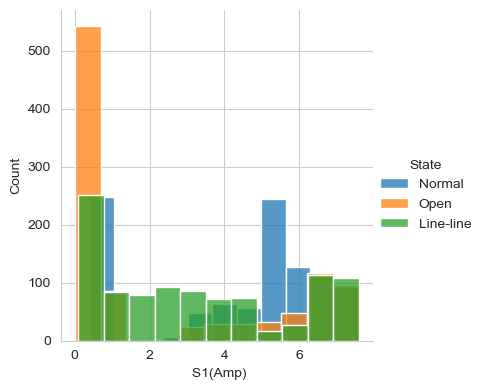

In [65]:
sns.FacetGrid(df,
              hue='State',
              height=4).map(sns.histplot, ' S1(Amp)').add_legend()
plt.show()

C:\Users\Harun Ismail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harun Ismail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harun Ismail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


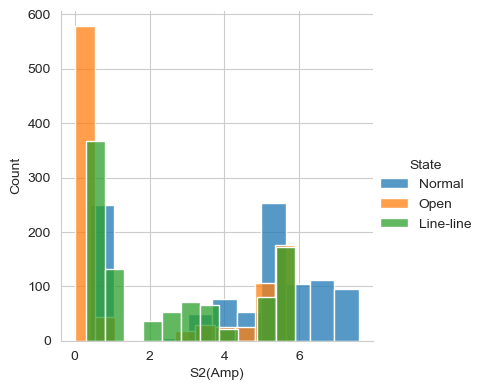

In [66]:
sns.FacetGrid(df,
              hue='State',
              height=4).map(sns.histplot, 'S2(Amp)').add_legend()
plt.show()

C:\Users\Harun Ismail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harun Ismail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harun Ismail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


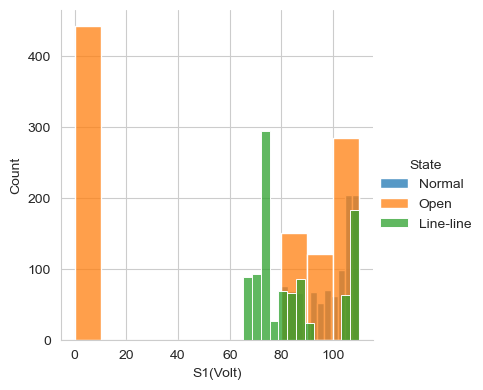

In [67]:
sns.FacetGrid(df,
              hue='State',
              height=4).map(sns.histplot, 'S1(Volt)').add_legend()
plt.show()

C:\Users\Harun Ismail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harun Ismail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harun Ismail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


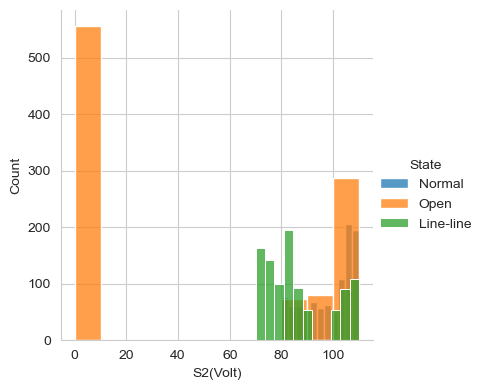

In [68]:
sns.FacetGrid(df,
              hue='State',
              height=4).map(sns.histplot, 'S2(Volt)').add_legend()
plt.show()

C:\Users\Harun Ismail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harun Ismail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harun Ismail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


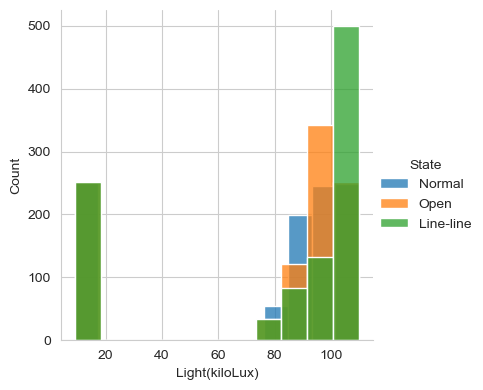

In [71]:
sns.FacetGrid(df,
              hue='State',
              height=4).map(sns.histplot, 'Light(kiloLux)').add_legend()
plt.show()

C:\Users\Harun Ismail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harun Ismail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harun Ismail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


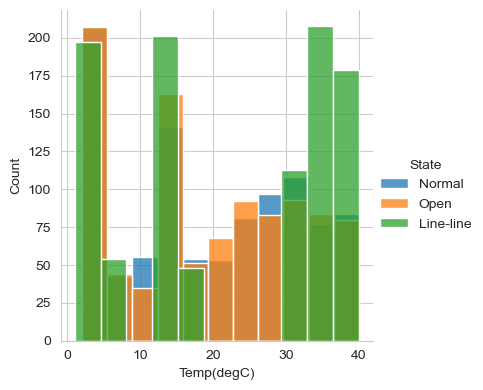

In [72]:
sns.FacetGrid(df,
              hue='State',
              height=4).map(sns.histplot, 'Temp(degC)').add_legend()
plt.show()

In [73]:
df.columns

Index([' S1(Amp)', 'S2(Amp)', 'S1(Volt)', 'S2(Volt)', 'Light(kiloLux)',
       'Temp(degC)', 'Weather', 'State'],
      dtype='object')

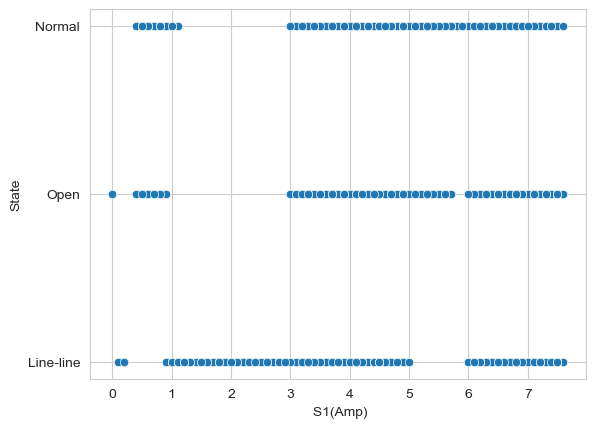

In [77]:
sns.scatterplot(df, 
                x=' S1(Amp)',
                y='State')
plt.show()

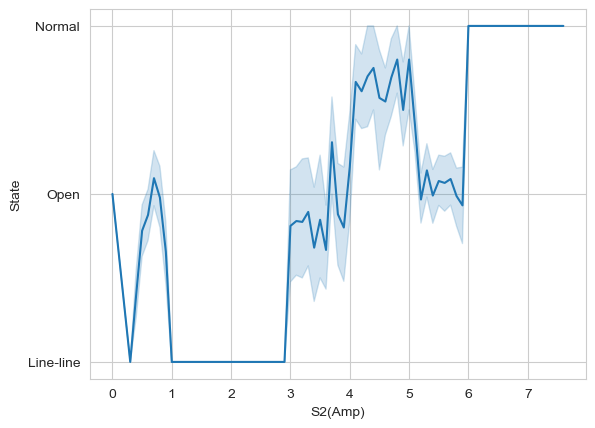

In [81]:
sns.lineplot(df,
             x='S2(Amp)',
             y='State')
plt.show()

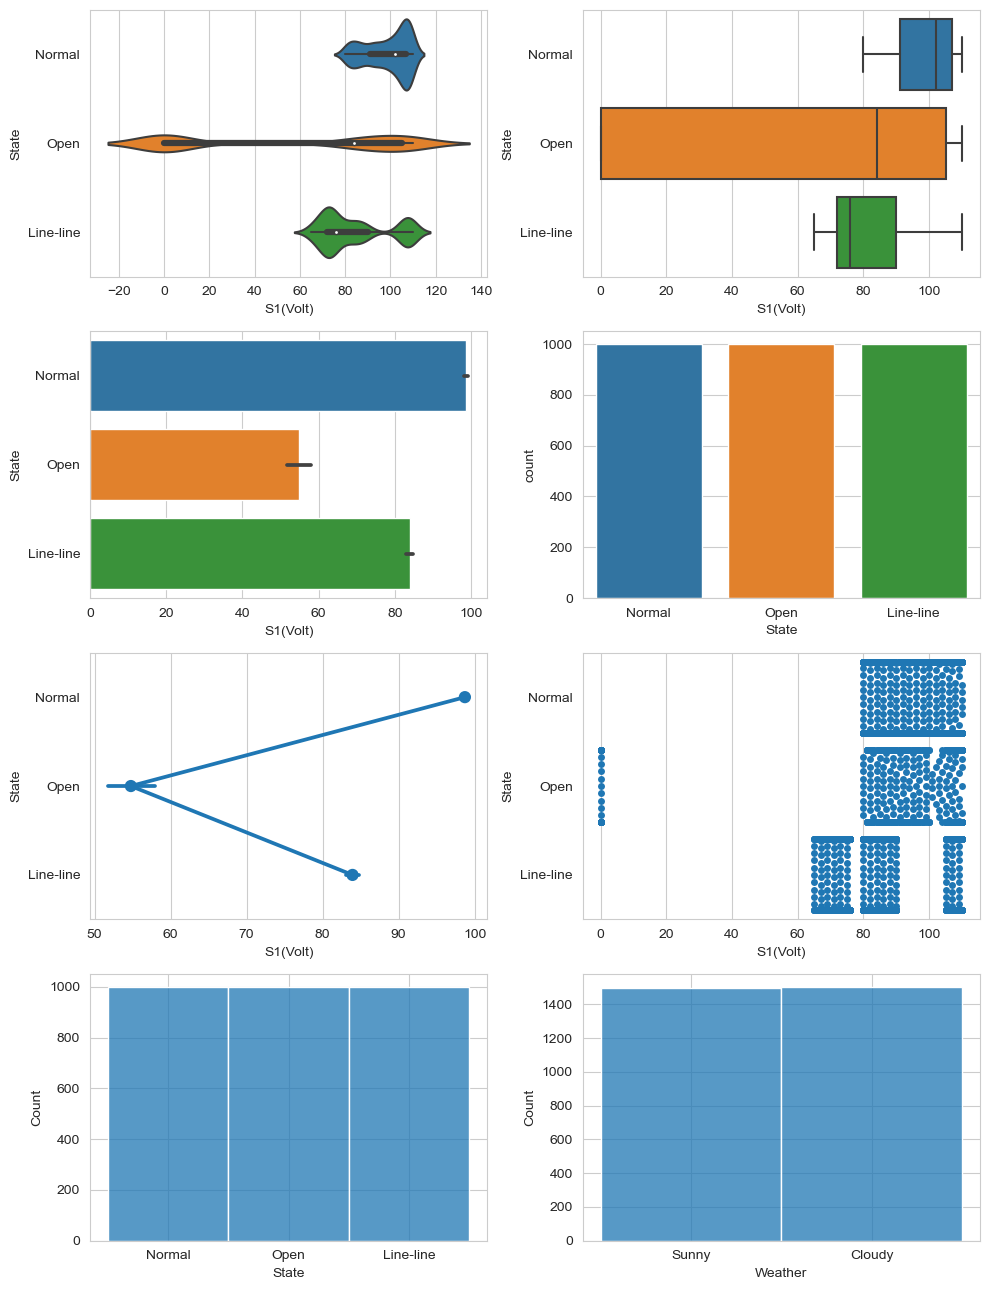

In [89]:
fig, axes = plt.subplots(4, 2, figsize=(10, 13))
axes = axes.flatten()

#kind of plots
sns.violinplot(df, ax=axes[0], x='S1(Volt)', y='State')
sns.boxplot(df, ax=axes[1], x='S1(Volt)', y='State')
sns.barplot(df, ax=axes[2], x='S1(Volt)', y='State')
sns.countplot(df, ax=axes[3], x='State')
sns.pointplot(df, ax=axes[4], x='S1(Volt)', y='State')
sns.swarmplot(df, ax=axes[5], x='S1(Volt)', y='State')
sns.histplot(df, ax=axes[6], x='State', bins=20, kde=False)
sns.histplot(df, ax=axes[7], x='Weather', bins=20, kde=False)

plt.tight_layout()
plt.show()

C:\Users\Harun Ismail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harun Ismail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harun Ismail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harun Ismail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

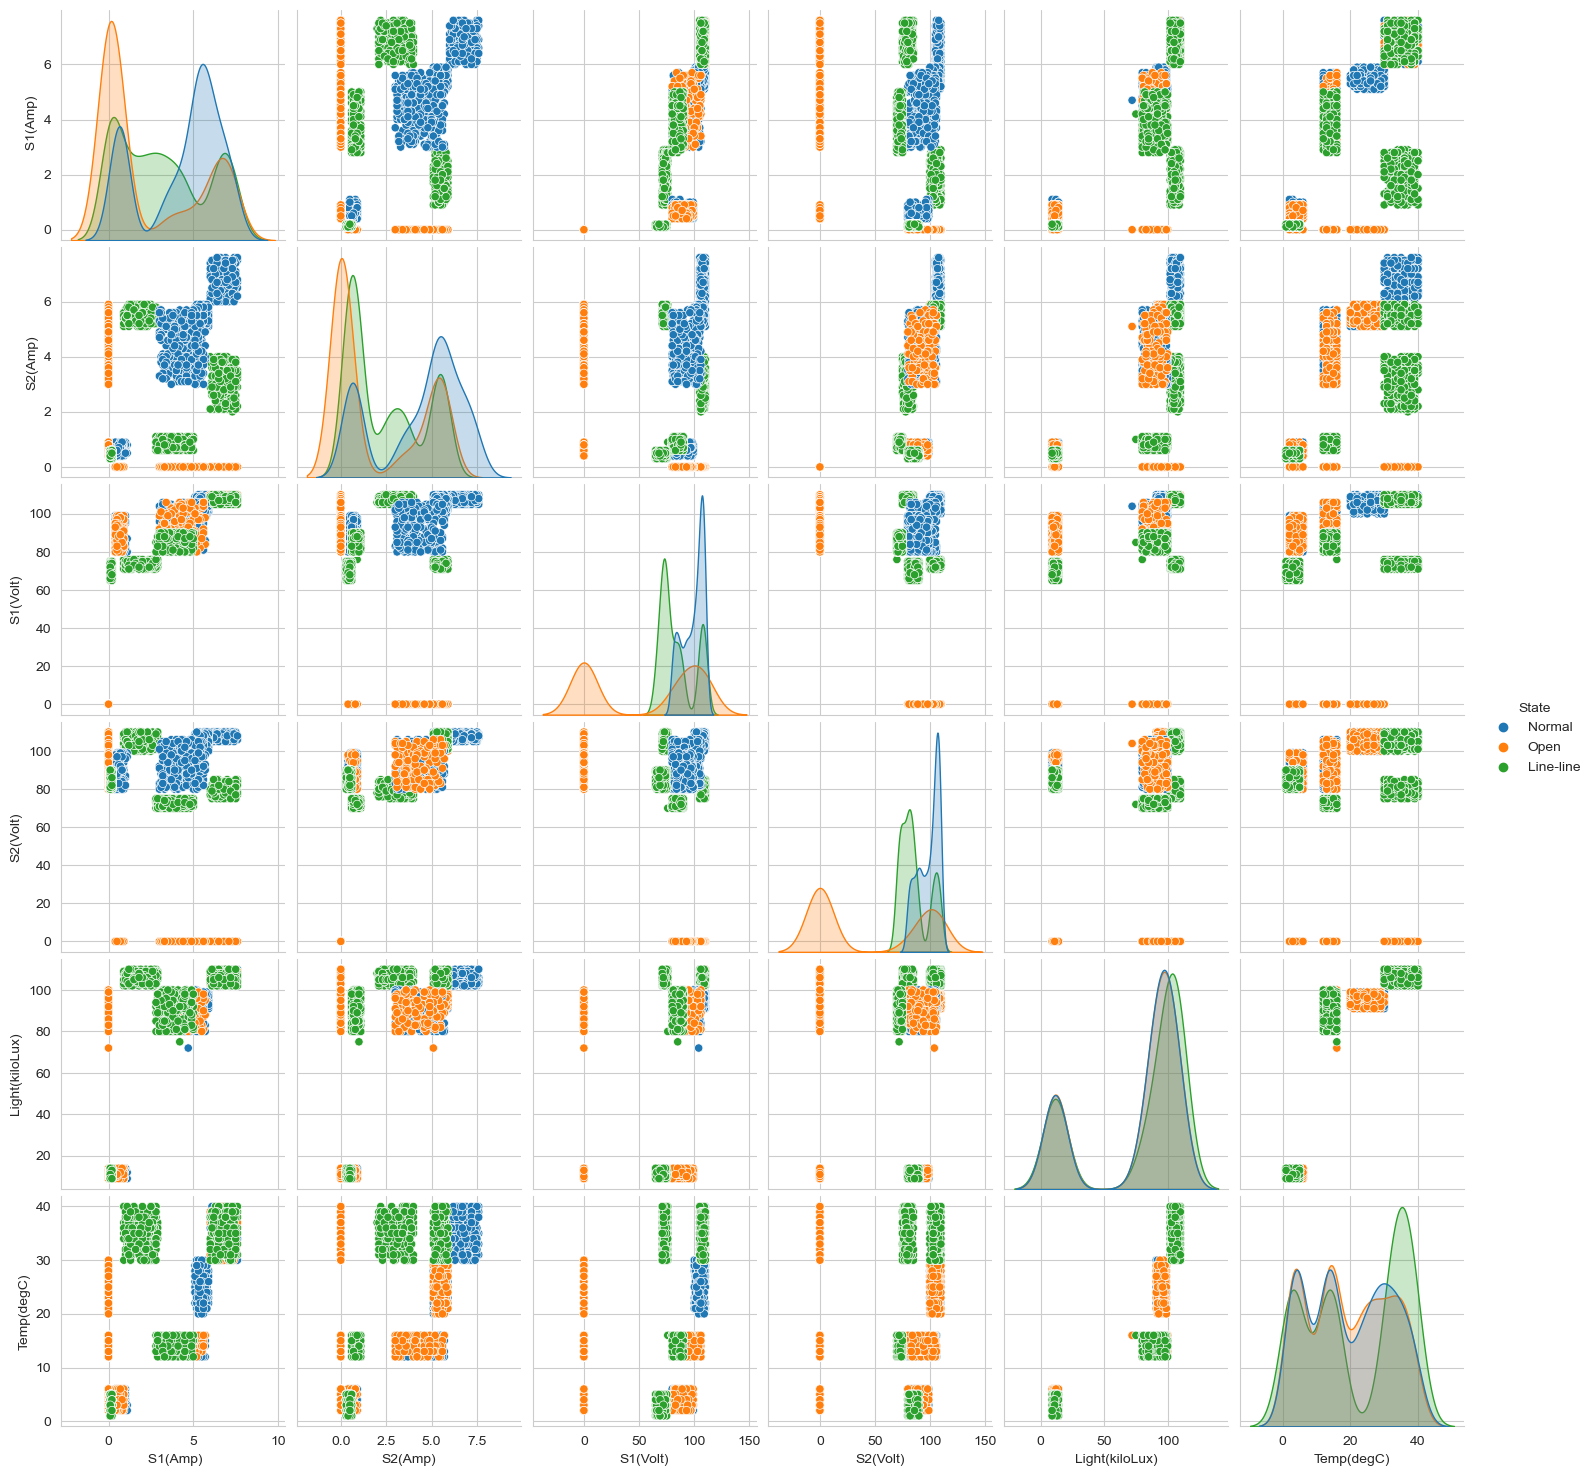

In [50]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='State')
plt.show()

In [108]:
df1 = df.drop(columns=['Weather', 'State'])

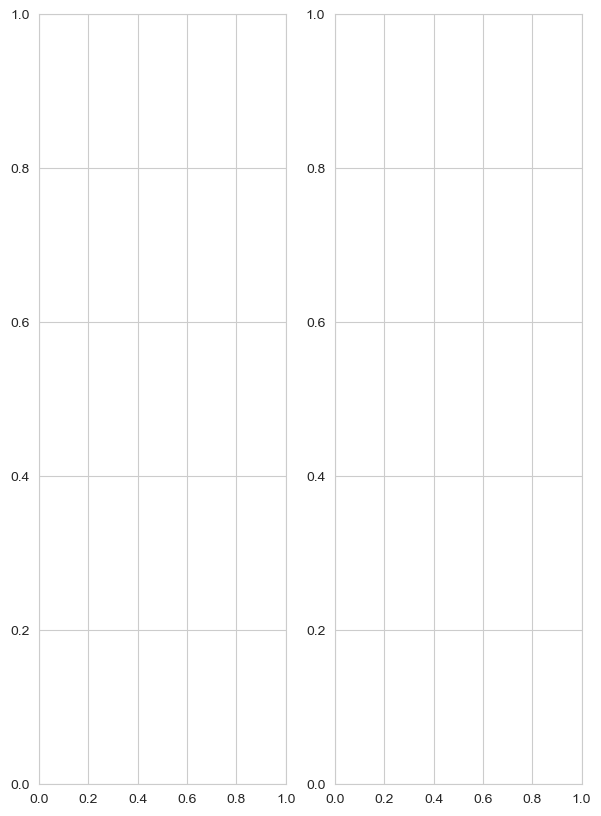

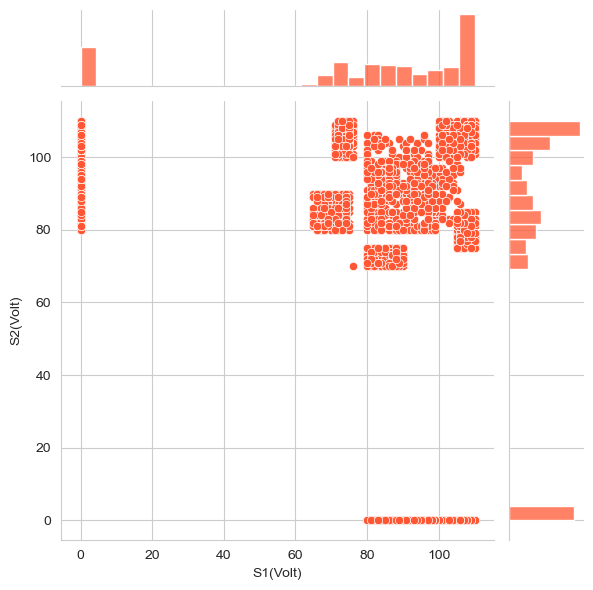

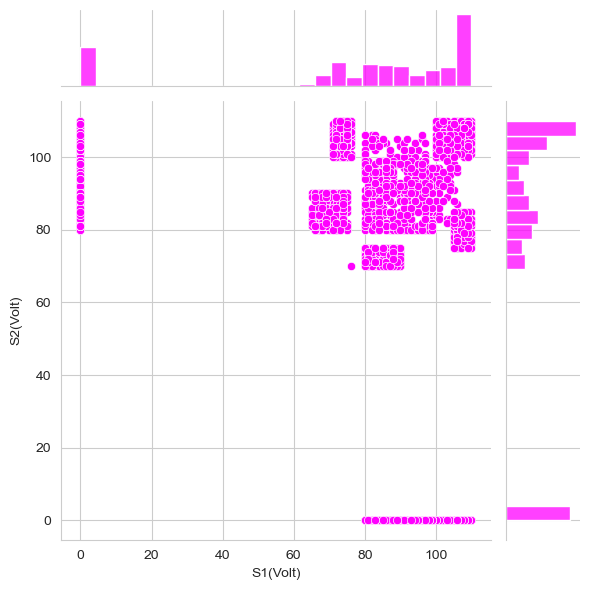

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(7, 10))
# axes = axes.flatten()

sns.jointplot(df, x='S1(Volt)', y='S2(Volt)', kind='scatter', ax=axes[0], color='#FF5733')
sns.jointplot(df, x='S1(Volt)', y='S2(Volt)', kind='scatter', ax=axes[1], color='magenta')

plt.tight_layout()
plt.show()

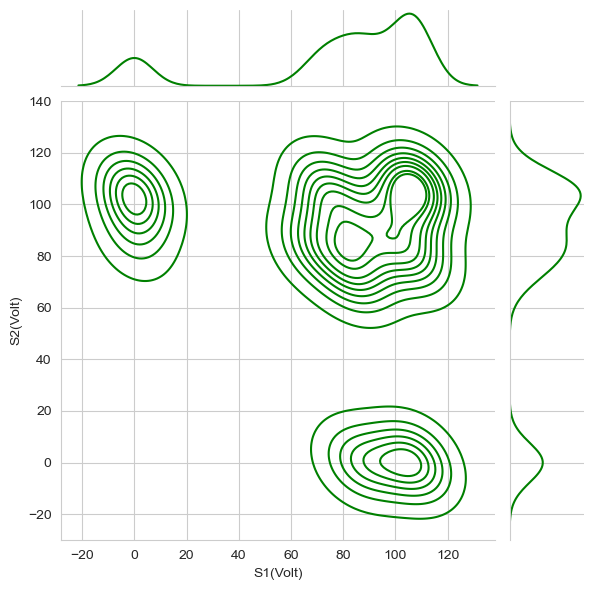

In [119]:
sns.jointplot(df, x='S1(Volt)', y='S2(Volt)', kind='kde', color='g')
plt.show()

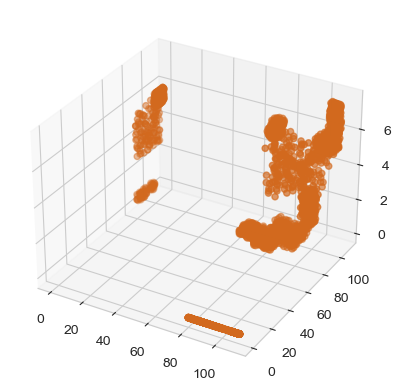

In [124]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['S1(Volt)'],
           df['S2(Volt)'],
           df['S2(Amp)'], color='#D2691E')

plt.show()

In [121]:
df.columns

Index([' S1(Amp)', 'S2(Amp)', 'S1(Volt)', 'S2(Volt)', 'Light(kiloLux)',
       'Temp(degC)', 'Weather', 'State'],
      dtype='object')

## Data Preprocessing

In [432]:
df['Weather'].unique()

array(['Sunny', 'Cloudy'], dtype=object)

In [433]:
df['Weather'], _ = pd.factorize(df['Weather'])
df['State'], _ = pd.factorize(df['State'])

In [434]:
df

,S1(Amp),S2(Amp),S1(Volt),S2(Volt),Light(kiloLux),Temp(degC),Weather,State
0,6.4,6.8,108,109,107.0,34,0,0
1,7.1,6.5,110,107,108.0,38,0,0
2,6.2,6.5,106,107,107.0,36,0,0
3,7.4,6.1,108,109,104.0,35,0,0
4,6.5,6.9,109,109,109.0,38,0,0
...,...,...,...,...,...,...,...,...
2995,0.1,0.5,66,81,12.0,2,1,2
2996,0.2,0.5,69,82,13.0,1,1,2
2997,0.1,0.5,72,89,11.0,3,1,2
2998,0.1,0.4,69,90,9.0,1,1,2


In [435]:
#Class
"Normal=0" 
"Open=1"
"Line-line"
#Weather
"Sunny=0"
"Cloudy=1"

'Cloudy=1'

In [436]:
df['State'].unique()

array([0, 1, 2], dtype=int64)

In [437]:
df['Weather'].unique()

array([0, 1], dtype=int64)

## Building Model

In [438]:
df

,S1(Amp),S2(Amp),S1(Volt),S2(Volt),Light(kiloLux),Temp(degC),Weather,State
0,6.4,6.8,108,109,107.0,34,0,0
1,7.1,6.5,110,107,108.0,38,0,0
2,6.2,6.5,106,107,107.0,36,0,0
3,7.4,6.1,108,109,104.0,35,0,0
4,6.5,6.9,109,109,109.0,38,0,0
...,...,...,...,...,...,...,...,...
2995,0.1,0.5,66,81,12.0,2,1,2
2996,0.2,0.5,69,82,13.0,1,1,2
2997,0.1,0.5,72,89,11.0,3,1,2
2998,0.1,0.4,69,90,9.0,1,1,2


In [439]:
#Split dataset into X & y
X = df.iloc[:, 0:7]
y = df.iloc[:, 7]

In [440]:
#Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [267]:
X_train

,S1(Amp),S2(Amp),S1(Volt),S2(Volt),Light(kiloLux),Temp(degC),Weather
642,0.0,5.2,0,105,97.0,26,0
700,0.0,5.8,0,106,95.0,24,0
226,7.4,6.7,108,107,103.0,38,0
1697,3.1,5.2,80,102,90.0,12,0
1010,6.5,3.2,109,77,105.0,34,0
...,...,...,...,...,...,...,...
1638,4.7,3.2,81,94,97.0,16,0
1095,7.0,2.1,108,76,109.0,31,0
1130,7.4,3.8,105,79,106.0,35,0
1294,1.4,5.7,71,109,103.0,33,1


In [268]:
X_test

,S1(Amp),S2(Amp),S1(Volt),S2(Volt),Light(kiloLux),Temp(degC),Weather
1801,0.9,0.4,98,85,9.0,5,1
1190,7.4,2.9,108,82,106.0,35,0
1817,0.8,0.6,82,85,9.0,5,1
251,5.9,5.2,106,107,94.0,23,1
2505,5.0,1.1,85,75,89.0,15,0
...,...,...,...,...,...,...,...
104,6.7,7.5,109,106,105.0,38,0
2087,0.0,4.9,0,80,94.0,15,0
599,0.0,5.3,0,106,96.0,21,0
1756,0.8,0.6,98,91,12.0,5,1


In [269]:
y_train

642     1
700     1
226     0
1697    0
1010    2
       ..
1638    0
1095    2
1130    2
1294    2
860     1
Name: State, Length: 2400, dtype: int64

In [270]:
y_test

1801    0
1190    2
1817    0
251     0
2505    2
       ..
104     0
2087    1
599     1
1756    0
1323    2
Name: State, Length: 600, dtype: int64

In [271]:
#Data Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

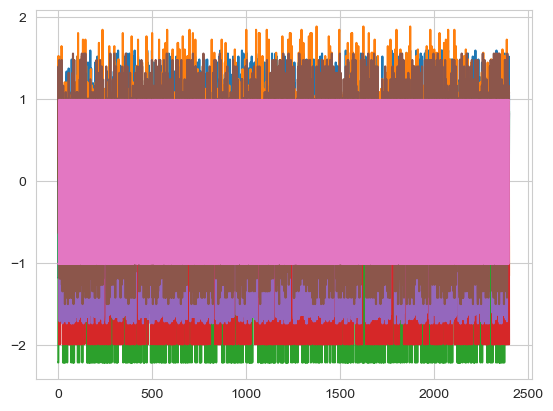

In [272]:
plt.plot(X_train)
plt.show()

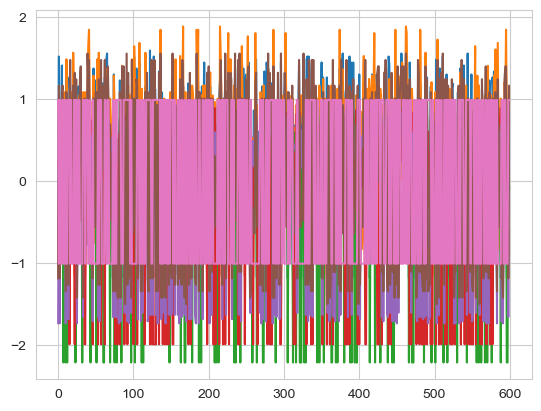

In [273]:
plt.plot(X_test)
# plt.legend()
plt.show()

In [394]:
#Dimensionality Reduction
# lda = LinearDiscriminantAnalysis(n_components=2,
#                                  solver='eigen',
#                                  shrinkage='auto')
# X_train_lda = lda.fit_transform(X_train, y_train)
# X_test_lda = lda.transform(X_test)

pca = PCA(n_components=0.45,
          whiten=False)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

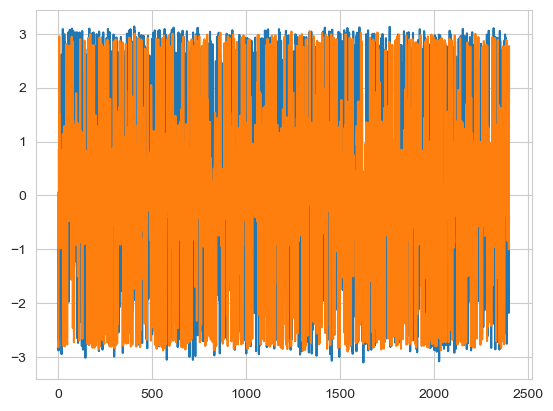

In [395]:
plt.plot(X_train_pca)
plt.show()

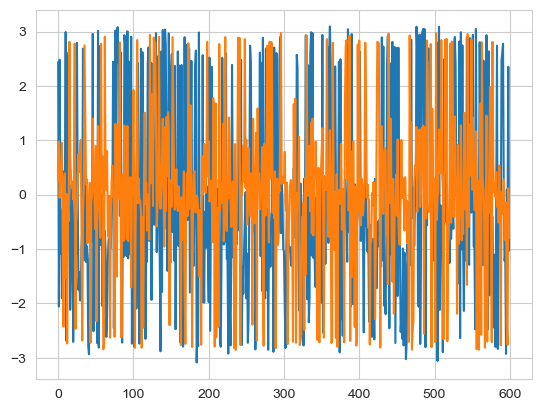

In [396]:
plt.plot(X_test_pca)
plt.show()

In [397]:
#Base Learner
random_forest = RandomForestClassifier(n_estimators=50,
                                       random_state=42)
gradient_boosting = GradientBoostingClassifier(n_estimators=50,
                                               random_state=42)
ada_boost = AdaBoostClassifier(n_estimators=50,
                               random_state=42)

In [398]:
#Meta Learner
voting_clf = VotingClassifier(
    estimators=[('rf', random_forest), 
                 ('gb', gradient_boosting), 
                 ('ada', ada_boost)],
    voting='soft'
)

In [399]:
voting_clf.fit(X_train_pca, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(n_estimators=50,
                                                         random_state=42)),
                             ('ada', AdaBoostClassifier(random_state=42))],
                 voting='soft')

In [400]:
y_pred = voting_clf.predict(X_test_pca)

In [401]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred,  digits=4))

# Print confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9817

Classification Report:
              precision    recall  f1-score   support

           0     0.9771    0.9726    0.9748       219
           1     1.0000    1.0000    1.0000       190
           2     0.9688    0.9738    0.9713       191

    accuracy                         0.9817       600
   macro avg     0.9819    0.9821    0.9820       600
weighted avg     0.9817    0.9817    0.9817       600


Confusion Matrix:
[[213   0   6]
 [  0 190   0]
 [  5   0 186]]


## Banchmarking models

In [418]:
def build_generator(input_dim, output_dim):
    model = models.Sequential([
        layers.Dense(128, input_dim=input_dim, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(output_dim, activation='tanh')
    ])
    return model

In [419]:
def build_discriminator(input_dim, num_classes):
    model = models.Sequential([
        layers.Dense(512, input_dim=input_dim, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(0.0002, 0.5), metrics=['accuracy'])
    return model

In [420]:
def build_gan(generator, discriminator):
    model = models.Sequential()
    discriminator.trainable = False
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(0.0002, 0.5))
    return model

In [422]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
from tensorflow.keras.utils import to_categorical

# Hyperparameters
latent_dim = 100
epochs = 10000
batch_size = 64

# Build and compile models
generator = build_generator(latent_dim, X_train.shape[1])
discriminator = build_discriminator(X_train.shape[1], num_classes=3)
gan = build_gan(generator, discriminator)

# Training loop
half_batch = batch_size // 2

for epoch in range(epochs):
    # Train Discriminator
    idx = np.random.randint(0, X_train.shape[0], half_batch)
    real_samples = X_train[idx]
    real_labels = y_train[idx]   # y_train should already be one-hot encoded

    noise = np.random.normal(0, 1, (half_batch, latent_dim))
    generated_samples = generator.predict(noise)
    fake_labels = np.zeros((half_batch, 3))  # One-hot encoded, all zeros
    
    d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
    d_loss_fake = discriminator.train_on_batch(generated_samples, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_y = np.ones((batch_size, 3))  # One-hot encoded, all ones
    g_loss = gan.train_on_batch(noise, valid_y)

    if epoch % 1000 == 0:
        print(f"Epoch {epoch} - Discriminator Loss: {d_loss[0]:.4f}, Generator Loss: {g_loss:.4f}")

In [428]:
df

,S1(Amp),S2(Amp),S1(Volt),S2(Volt),Light(kiloLux),Temp(degC),Weather,State
0,6.4,6.8,108,109,107.0,34,0,0
1,7.1,6.5,110,107,108.0,38,0,0
2,6.2,6.5,106,107,107.0,36,0,0
3,7.4,6.1,108,109,104.0,35,0,0
4,6.5,6.9,109,109,109.0,38,0,0
...,...,...,...,...,...,...,...,...
2995,0.1,0.5,66,81,12.0,2,1,2
2996,0.2,0.5,69,82,13.0,1,1,2
2997,0.1,0.5,72,89,11.0,3,1,2
2998,0.1,0.4,69,90,9.0,1,1,2


## Deep Learning

Epoch 1/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8287 - loss: 0.6549 - val_accuracy: 1.0000 - val_loss: 0.0186
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9979 - loss: 0.0149 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9991 - loss: 0.0054 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.5783e-04 - val_accuracy: 1.0000 - val_loss: 6.2353e-04
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9944 - loss: 0.0111 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.9425e-04 - val_accuracy

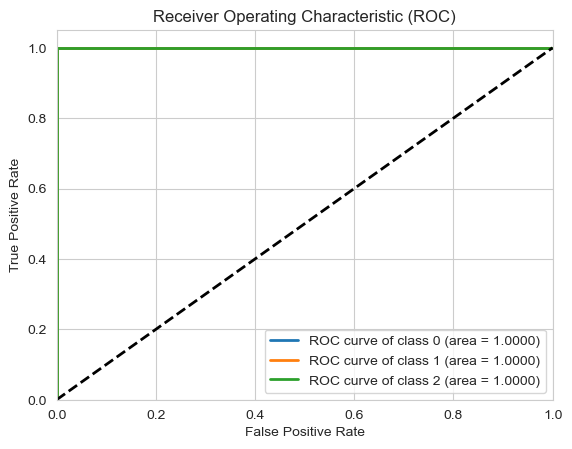

In [449]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the deep learning model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # Output layer with 3 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluate the model on test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate ROC AUC and plot ROC curves
n_classes = 3
y_test_bin = tf.keras.utils.to_categorical(y_test, num_classes=n_classes)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_probs[:, i])

# Plot ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [457]:
model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                     │ (None, 256)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 136,139 (531.80 KB)

 Trainable params: 45,379 (177.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 90,760 (354.54 KB)